In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

/usr/lib/python3/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWar

2113536/2110848 [==============================] - 9s 4us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
train_labels[10] # Doesn't work.  1 Command at a time
train_labels[12]

4

In [7]:
train_labels[10]

3

In [8]:
# Decode vectors back to text

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 1s 2us/step


In [13]:
decoded_newswire[3:]

' ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [16]:
# Preparing the Data

import numpy as np

# Use Padding to Zero out and make default a tensor shape to feed into the model
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


# Vectorize labels with one-hot encoding
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)


"""
#There is built-in way to do with Keras

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
"""

In [18]:
# Building the Network

    # Layers-Optimizer-Loss-Model
    
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
# Create a Validation Set

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [21]:
# Train the Network

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 132us/step - loss: 2.7269 - accuracy: 0.5019 - val_loss: 1.8206 - val_accuracy: 0.6380
Epoch 2/20
7982/7982 [==============================] - 0s 48us/step - loss: 1.4496 - accuracy: 0.7073 - val_loss: 1.3271 - val_accuracy: 0.7060
Epoch 3/20
7982/7982 [==============================] - 0s 43us/step - loss: 1.0563 - accuracy: 0.7737 - val_loss: 1.1328 - val_accuracy: 0.7500
Epoch 4/20
7982/7982 [==============================] - 0s 46us/step - loss: 0.8268 - accuracy: 0.8212 - val_loss: 1.0114 - val_accuracy: 0.7860
Epoch 5/20
7982/7982 [==============================] - 0s 47us/step - loss: 0.6542 - accuracy: 0.8657 - val_loss: 0.9530 - val_accuracy: 0.7900
Epoch 6/20
7982/7982 [==============================] - 0s 46us/step - loss: 0.5220 - accuracy: 0.8919 - val_loss: 0.9064 - val_accuracy: 0.8080
Epoch 7/20
7982/7982 [==============================] - 0s 47us/step - loss: 0.4

In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

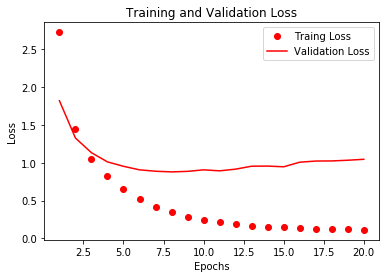

In [25]:
# Plot Accuracy and Loss

import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'ro', label='Traing Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

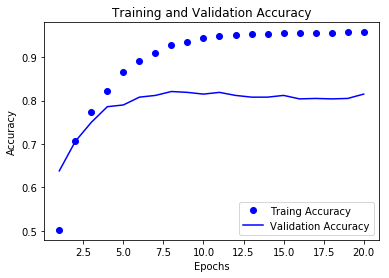

In [26]:
plt.clf()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Traing Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [27]:
# Build a new model with reference to the graph; 
# in this case, setting epochs=9 as the graph shows overfitting after 9 epochs

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 0s 57us/step - loss: 2.7353 - accuracy: 0.5227 - val_loss: 1.7763 - val_accuracy: 0.6250
Epoch 2/9
7982/7982 [==============================] - 0s 42us/step - loss: 1.4308 - accuracy: 0.7068 - val_loss: 1.2782 - val_accuracy: 0.7210
Epoch 3/9
7982/7982 [==============================] - 0s 43us/step - loss: 1.0351 - accuracy: 0.7819 - val_loss: 1.1158 - val_accuracy: 0.7580
Epoch 4/9
7982/7982 [==============================] - 0s 42us/step - loss: 0.8062 - accuracy: 0.8302 - val_loss: 1.0151 - val_accuracy: 0.7800
Epoch 5/9
7982/7982 [==============================] - 0s 43us/step - loss: 0.6434 - accuracy: 0.8648 - val_loss: 0.9502 - val_accuracy: 0.8040
Epoch 6/9
7982/7982 [==============================] - 0s 43us/step - loss: 0.5108 - accuracy: 0.8916 - val_loss: 0.9174 - val_accuracy: 0.8170
Epoch 7/9
7982/7982 [==============================] - 0s 45us/step - loss: 0.4158 - acc

In [28]:
results

[0.9656539254175799, 0.7867319583892822]

In [29]:
# Predictions on New Data :  x_test can be any new data
predictions = model.predict(x_test)

In [30]:
predictions[0].shape

(46,)

In [31]:
np.sum(predictions[0])

0.9999999

In [32]:
np.argmax(predictions[0])

3